# KGS Production Data Carpentry
This purpose of this notebook is to document the data carpentry activities to prepare the oil & gas production data from the Kansas Geologic Survey (KGS) for futher analysis and exploration. 

## Oil & Gas Production by County
Excel files with state and county monthly and annual production. Data from 1970 and after created from the lease-production database and aggregated into county form. Data for 1969 and before is typed in from published sources (Survey bulletins, special distribution publications, etc.).

Source: http://www.kgs.ku.edu/PRS/petro/interactive.html

### Download the ANNUAL data
Programatically download the data from source URLs

In [1]:
# Annual production by county 
county_prod_source = ['http://www.kgs.ku.edu/PRS/County/cnty_ann_1950s.xls',
                     'http://www.kgs.ku.edu/PRS/County/cnty_ann_1960s.xls',
                     'http://www.kgs.ku.edu/PRS/County/cnty_ann_1970s.xls',
                     'http://www.kgs.ku.edu/PRS/County/cnty_ann_1980s.xls',
                     'http://www.kgs.ku.edu/PRS/County/cnty_ann_1990s.xls',
                     'http://www.kgs.ku.edu/PRS/County/cnty_ann_2000s.xls',
                     'http://www.kgs.ku.edu/PRS/County/cnty_ann_2010s.xlsx']

In [4]:
import os
import requests

def download(url: str, dest_folder: str):
    if not os.path.exists(dest_folder):
        os.makedirs(dest_folder)  # create folder if it does not exist

    filename = url.split('/')[-1].replace(" ", "_")  # be careful with file names
    file_path = os.path.join(dest_folder, filename)

    r = requests.get(url, stream=True)
    if r.ok:
        print("saving to", os.path.abspath(file_path))
        with open(file_path, 'wb') as f:
            for chunk in r.iter_content(chunk_size=1024 * 8):
                if chunk:
                    f.write(chunk)
                    f.flush()
                    os.fsync(f.fileno())
    else:  # HTTP status code 4XX/5XX
        print("Download failed: status code {}\n{}".format(r.status_code, r.text))
    return os.path.abspath(file_path)

dest = "../../../casestudy_data/group_2/kgs_production_data/county"

downloaded = []

for source in county_prod_source:
    downloaded.append(download(source, dest_folder= dest))


saving to /Users/ian/dsa/casestudy_data/group_2/kgs_production_data/county/cnty_ann_1950s.xls
saving to /Users/ian/dsa/casestudy_data/group_2/kgs_production_data/county/cnty_ann_1960s.xls
saving to /Users/ian/dsa/casestudy_data/group_2/kgs_production_data/county/cnty_ann_1970s.xls
saving to /Users/ian/dsa/casestudy_data/group_2/kgs_production_data/county/cnty_ann_1980s.xls
saving to /Users/ian/dsa/casestudy_data/group_2/kgs_production_data/county/cnty_ann_1990s.xls
saving to /Users/ian/dsa/casestudy_data/group_2/kgs_production_data/county/cnty_ann_2000s.xls
saving to /Users/ian/dsa/casestudy_data/group_2/kgs_production_data/county/cnty_ann_2010s.xlsx


### Explore raw data format

In [5]:
import pandas as pd

In [7]:
pd.read_excel(downloaded[0])

,COUNTY,1950_OIL_PROD,1950_OIL_WELLS,1950_GAS_PROD,1950_GAS_WELLS,1951_OIL_PROD,1951_OIL_WELLS,1951_GAS_PROD,1951_GAS_WELLS,1952_OIL_PROD,...,1957_GAS_PROD,1957_GAS_WELLS,1958_OIL_PROD,1958_OIL_WELLS,1958_GAS_PROD,1958_GAS_WELLS,1959_OIL_PROD,1959_OIL_WELLS,1959_GAS_PROD,1959_GAS_WELLS
0,Allen,318658.0,363.0,463648,139.0,364657.0,23.0,502079,126.0,609577.0,...,113465.0,41.0,963524.0,37.0,111219.0,61.0,979234.0,1981.0,109967.0,57.0
1,Anderson,543875.0,228.0,NaN,NaN,551340.0,NaN,6900,6.0,576882.0,...,NaN,NaN,554646.0,1268.0,NaN,NaN,488405.0,1269.0,NaN,NaN
2,Atchison,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Barber,1139892.0,143.0,10483580,67.0,973797.0,144.0,9574988,67.0,986825.0,...,53465524.0,263.0,1913616.0,490.0,51428584.0,298.0,1640686.0,503.0,55081079.0,385.0
4,Barton,19424231.0,2718.0,3980091,51.0,18956122.0,2825.0,3302662,43.0,16959379.0,...,554108.0,19.0,11546500.0,3286.0,370525.0,12.0,11404683.0,3262.0,1018705.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,Wilson,71005.0,146.0,532369,171.0,68974.0,NaN,110845,49.0,67271.0,...,205668.0,59.0,194251.0,623.0,265265.0,34.0,206834.0,679.0,125486.0,28.0
91,Woodson,624366.0,253.0,57406,6.0,619760.0,NaN,22540,3.0,631511.0,...,145511.0,13.0,830771.0,1111.0,26044.0,3.0,815355.0,1117.0,13201.0,2.0
92,Wyandotte,NaN,NaN,81778,11.0,NaN,NaN,5630,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93,Statewide,107339000.0,24406.0,393968000,3308.0,113912366.0,19672.0,407192252,3346.0,114399556.0,...,580698954.0,5359.0,119942094.0,43172.0,535937434.0,5586.0,119473875.0,45279.0,595244836.0,5669.0


### Explode columns to rows
We need to transform our data to look more like this:

|county|year|oil_prod|oil_wells|gas_prod|gas_wells|
|------|----|--------|---------|--------|---------|
|Allen |1950|xxxxxxxx|xxxx|xxxxxxx|xxxx|
|Allen |1951|xxxxxxxx|xxxx|xxxxxxx|xxxx|
|Allen |1952|xxxxxxxx|xxxx|xxxxxxx|xxxx|
|Allen |1953|xxxxxxxx|xxxx|xxxxxxx|xxxx|

In [8]:
def customExplode(df):
    """
    This function takes a dataframe in the raw KGS schema and transforms
    to a df where prod and well cols are exploded to rows, by county and year
    """
    # Get col index for by year, by attr
    col_idx = {}

    i = 1 # Skip the first column, "county"
    while i < len(df.columns):
        col = df.columns[i].strip()
        year = col[0:4]
        oil_prod_idx = i
        oil_wells_idx = i + 1
        gas_prod_idx = i + 2
        gas_wells_idx = i + 3
        col_idx[year] =[oil_prod_idx, oil_wells_idx, gas_prod_idx, gas_wells_idx]
        i += 4
    
    # Init new dataframe
    df2 = pd.DataFrame(columns = ['county',
                                  'year',
                                  'oil_prod',
                                  'oil_wells',
                                  'gas_prod',
                                  'gas_wells'])

    years = list(col_idx.keys())
    counties = list(df['COUNTY'].dropna().unique())
    
    for county in counties:
        for year in years:
            oil_prod = float(df.loc[df['COUNTY'] == county][df.columns[col_idx[year][0]]])
            oil_wells = float(df.loc[df['COUNTY'] == county][df.columns[col_idx[year][1]]])
            gas_prod = float(df.loc[df['COUNTY'] == county][df.columns[col_idx[year][2]]])
            gas_wells = float(df.loc[df['COUNTY'] == county][df.columns[col_idx[year][3]]])
            record = pd.DataFrame([[county, year, oil_prod, oil_wells, gas_prod, gas_wells]],
                              columns = ['county', 'year', 'oil_prod', 'oil_wells', 'gas_prod', 'gas_wells'])
            df2 = df2.append(record, ignore_index=True)
        
    return df2

In [10]:
# Now let's do this for all the files we have
df = pd.DataFrame(columns = ['county',
                                  'year',
                                  'oil_prod',
                                  'oil_wells',
                                  'gas_prod',
                                  'gas_wells'])

for file in downloaded:
    df_temp = pd.read_excel(file)
    df_temp_exploded = customExplode(df_temp)
    df = df.append(df_temp_exploded, ignore_index=True)

/Users/ian/.pyenv/versions/3.8.5/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [11]:
df

,county,year,oil_prod,oil_wells,gas_prod,gas_wells
0,Allen,1950,318658.0,363.0,463648.0,139.0
1,Allen,1951,364657.0,23.0,502079.0,126.0
2,Allen,1952,609577.0,415.0,385683.0,113.0
3,Allen,1953,613418.0,553.0,357136.0,85.0
4,Allen,1954,828390.0,1319.0,317715.0,86.0
...,...,...,...,...,...,...
6605,State Total,2015,45467244.0,53573.0,285916558.0,24394.0
6606,State Total,2016,37943896.0,52889.0,246716821.0,23478.0
6607,State Total,2017,35824866.0,52768.0,220947327.0,22761.0
6608,State Total,2018,34715138.0,52295.0,202174163.0,22044.0


In [12]:
# Now let's do some QA and make sure everything looks right
df.describe()

,oil_prod,oil_wells,gas_prod,gas_wells
count,6.053000e+03,6037.000000,3.801000e+03,3694.000000
mean,1.575702e+06,1010.276131,2.113129e+07,493.385761
std,8.042608e+06,4712.250147,8.640851e+07,2045.135062
min,4.000000e+00,1.000000,3.000000e+00,1.000000
25%,7.868600e+04,53.000000,1.214210e+05,16.000000
50%,3.007280e+05,222.000000,7.361070e+05,62.000000
75%,8.222420e+05,692.000000,7.097917e+06,263.000000
max,1.244677e+08,53628.000000,1.034792e+09,25832.000000


In [13]:
pd.set_option('display.max_rows', 150)
df['county'].value_counts(dropna=False)

Seward          70
Neosho          70
Pottawatomie    70
Wabaunsee       70
Brown           70
Kearny          70
Douglas         70
Dickinson       70
Reno            70
Greenwood       70
Jefferson       70
Sumner          70
Stevens         70
Comanche        70
Ness            70
Gove            70
Cheyenne        70
Sherman         70
Saline          70
Elk             70
Phillips        70
Logan           70
Russell         70
Nemaha          70
Harvey          70
Osage           70
Linn            70
Rawlins         70
Wichita         70
Scott           70
Kingman         70
Allen           70
Greeley         70
Chase           70
Haskell         70
Lyon            70
Stanton         70
Hodgeman        70
Bourbon         70
Rice            70
Hamilton        70
Ford            70
Miami           70
Trego           70
Chautauqua      70
Stafford        70
Crawford        70
Marion          70
Morton          70
Sedgwick        70
Thomas          70
Cowley          70
Edwards     

In [14]:
# Handle some duplicate/similar names
df['county'] = df['county'].replace('Mcpherson', 'McPherson')
df['county'] = df['county'].replace('Statewide', 'State Total')
df['county'].value_counts(dropna=False)

Seward          70
Jefferson       70
Russell         70
Pottawatomie    70
Wabaunsee       70
Brown           70
Kearny          70
Douglas         70
Dickinson       70
Reno            70
Greenwood       70
Neosho          70
Stevens         70
Sumner          70
Comanche        70
Ness            70
Gove            70
Cheyenne        70
Sherman         70
Saline          70
Elk             70
Phillips        70
State Total     70
Nemaha          70
Crawford        70
Osage           70
Linn            70
Rawlins         70
Wichita         70
Scott           70
Kingman         70
Allen           70
Greeley         70
Chase           70
Haskell         70
Lyon            70
Stanton         70
Hodgeman        70
Bourbon         70
Rice            70
Hamilton        70
Ford            70
Miami           70
Trego           70
Chautauqua      70
Stafford        70
Logan           70
Marion          70
Harvey          70
Kiowa           70
Thomas          70
Cowley          70
Edwards     

In [15]:
df['year'].value_counts(dropna=False).sort_index(ascending=True)

1950    94
1951    94
1952    94
1953    94
1954    94
1955    94
1956    94
1957    94
1958    94
1959    94
1960    94
1961    94
1962    94
1963    94
1964    94
1965    94
1966    94
1967    94
1968    94
1969    94
1970    95
1971    95
1972    95
1973    95
1974    95
1975    95
1976    95
1977    95
1978    95
1979    95
1980    95
1981    95
1982    95
1983    95
1984    95
1985    95
1986    95
1987    95
1988    95
1989    95
1990    95
1991    95
1992    95
1993    95
1994    95
1995    95
1996    95
1997    95
1998    95
1999    95
2000    94
2001    94
2002    94
2003    94
2004    94
2005    94
2006    94
2007    94
2008    94
2009    94
2010    94
2011    94
2012    94
2013    94
2014    94
2015    94
2016    94
2017    94
2018    94
2019    94
Name: year, dtype: int64

In [16]:
# Looks like Cherokee county is not included outside of 1970-1999
df[df['county'] == 'Cherokee']

,county,year,oil_prod,oil_wells,gas_prod,gas_wells
1980,Cherokee,1970,NaN,NaN,NaN,NaN
1981,Cherokee,1971,NaN,NaN,NaN,NaN
1982,Cherokee,1972,NaN,NaN,NaN,NaN
1983,Cherokee,1973,NaN,NaN,NaN,NaN
1984,Cherokee,1974,NaN,NaN,NaN,NaN
1985,Cherokee,1975,NaN,NaN,NaN,NaN
1986,Cherokee,1976,NaN,NaN,NaN,NaN
1987,Cherokee,1977,NaN,NaN,NaN,NaN
1988,Cherokee,1978,NaN,NaN,NaN,NaN
1989,Cherokee,1979,NaN,NaN,NaN,NaN


In [16]:
# No production in Cherokee county anyways

In [17]:
# Otherwise looks good, let's write to csv
df.to_csv('../../../casestudy_data/group_2/kgs_production_data/county/county_production_annual.csv')

### Explore the data
Now we haveå the data combined and cleaned up, let's explore and see what we've got

<AxesSubplot:title={'center':'Annual Oil Production in Kansas (bbls)'}, xlabel='year'>

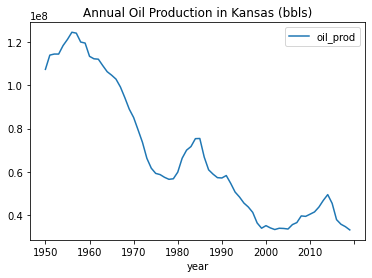

In [17]:
# Oil production by year ("State Total")
df[df['county']=='State Total'].plot(x = 'year', y = ['oil_prod'], title = "Annual Oil Production in Kansas (bbls)")

<AxesSubplot:title={'center':'Annual Gas Production in Kansas (mcf)'}, xlabel='year'>

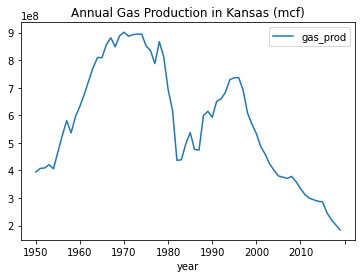

In [18]:
# Gas production by year ("State Total")
df[df['county']=='State Total'].plot(x = 'year', y = ['gas_prod'], title = "Annual Gas Production in Kansas (mcf)")

<AxesSubplot:title={'center':'Annual Oil & Gas Wells in Kansas (count)'}, xlabel='year'>

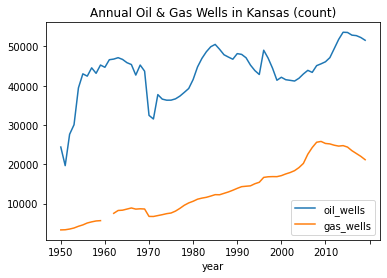

In [19]:
# Number of wells by year ("State Total")
df[df['county']=='State Total'].plot(x = 'year', y = ['oil_wells', 'gas_wells'], title = "Annual Oil & Gas Wells in Kansas (count)")

In [20]:
# Now let's look at some county level data

In [21]:
df.groupby("county").sum()

,oil_prod,oil_wells,gas_prod,gas_wells
county,,,,
Allen,3.720701e+07,111792.0,1.447646e+07,5083.0
Anderson,2.212056e+07,81707.0,5.542850e+05,137.0
Atchison,1.267000e+03,12.0,2.415231e+06,194.0
Barber,7.534998e+07,48500.0,1.454644e+09,45194.0
Barton,3.744971e+08,173961.0,5.344247e+07,2098.0
Bourbon,5.386422e+06,20055.0,2.334954e+06,761.0
Brown,2.733340e+05,155.0,0.000000e+00,0.0
Butler,2.329842e+08,145041.0,7.899850e+05,123.0
Chase,3.422321e+06,3610.0,1.216873e+07,4262.0


## Now let's look at monthly data

In [22]:
# Some are zipped, others aren't
county_prod_source_monthly_zipped = [
    'http://www.kgs.ku.edu/PRS/County/Years/1970s.zip',
    'http://www.kgs.ku.edu/PRS/County/Years/1980s.zip',
    'http://www.kgs.ku.edu/PRS/County/Years/1990s.zip'
]

# Note, 2000-2010 are .xls,, 2011-2021 .xlsx
county_prod_source_monthly = [
    'http://www.kgs.ku.edu/PRS/County/Years/2000.xls',
    'http://www.kgs.ku.edu/PRS/County/Years/2001.xls',
    'http://www.kgs.ku.edu/PRS/County/Years/2002.xls',
    'http://www.kgs.ku.edu/PRS/County/Years/2003.xls',
    'http://www.kgs.ku.edu/PRS/County/Years/2004.xls',
    'http://www.kgs.ku.edu/PRS/County/Years/2005.xls',
    'http://www.kgs.ku.edu/PRS/County/Years/2006.xls',
    'http://www.kgs.ku.edu/PRS/County/Years/2007.xls',
    'http://www.kgs.ku.edu/PRS/County/Years/2008.xls',
    'http://www.kgs.ku.edu/PRS/County/Years/2009.xls',
    'http://www.kgs.ku.edu/PRS/County/Years/2010.xls',
    'http://www.kgs.ku.edu/PRS/County/Years/2011.xlsx',
    'http://www.kgs.ku.edu/PRS/County/Years/2012.xlsx',
    'http://www.kgs.ku.edu/PRS/County/Years/2013.xlsx',
    'http://www.kgs.ku.edu/PRS/County/Years/2014.xlsx',
    'http://www.kgs.ku.edu/PRS/County/Years/2015.xlsx',
    'http://www.kgs.ku.edu/PRS/County/Years/2016.xlsx',
    'http://www.kgs.ku.edu/PRS/County/Years/2017.xlsx',
    'http://www.kgs.ku.edu/PRS/County/Years/2018.xlsx',
    'http://www.kgs.ku.edu/PRS/County/Years/2019.xlsx',
    'http://www.kgs.ku.edu/PRS/County/Years/2020.xlsx',
    'http://www.kgs.ku.edu/PRS/County/Years/2021.xlsx'
]

In [24]:
downloaded = []

for source in county_prod_source_monthly:
    downloaded.append(download(source, dest_folder= '../../../casestudy_data/group_2/kgs_production_data/county/monthly'))

saving to /Users/ian/dsa/casestudy_data/group_2/kgs_production_data/county/monthly/2000.xls
saving to /Users/ian/dsa/casestudy_data/group_2/kgs_production_data/county/monthly/2001.xls
saving to /Users/ian/dsa/casestudy_data/group_2/kgs_production_data/county/monthly/2002.xls
saving to /Users/ian/dsa/casestudy_data/group_2/kgs_production_data/county/monthly/2003.xls
saving to /Users/ian/dsa/casestudy_data/group_2/kgs_production_data/county/monthly/2004.xls
saving to /Users/ian/dsa/casestudy_data/group_2/kgs_production_data/county/monthly/2005.xls
saving to /Users/ian/dsa/casestudy_data/group_2/kgs_production_data/county/monthly/2006.xls
saving to /Users/ian/dsa/casestudy_data/group_2/kgs_production_data/county/monthly/2007.xls
saving to /Users/ian/dsa/casestudy_data/group_2/kgs_production_data/county/monthly/2008.xls
saving to /Users/ian/dsa/casestudy_data/group_2/kgs_production_data/county/monthly/2009.xls
saving to /Users/ian/dsa/casestudy_data/group_2/kgs_production_data/county/month

In [25]:
zipped_files = []
for source in county_prod_source_monthly_zipped:
    zipped_files.append(download(source, dest_folder= '../../../casestudy_data/group_2/kgs_production_data/county/monthly'))

saving to /Users/ian/dsa/casestudy_data/group_2/kgs_production_data/county/monthly/1970s.zip
saving to /Users/ian/dsa/casestudy_data/group_2/kgs_production_data/county/monthly/1980s.zip
saving to /Users/ian/dsa/casestudy_data/group_2/kgs_production_data/county/monthly/1990s.zip


In [34]:
from zipfile import ZipFile

for zipped in zipped_files:
    with ZipFile(zipped) as myzip:
        for member in myzip.namelist():
            if member.endswith('.xls'):
                downloaded.append(myzip.extract(member=member, path='../../../casestudy_data/group_2/kgs_production_data/county/monthly'))
downloaded

['/Users/ian/dsa/casestudy_data/group_2/kgs_production_data/county/monthly/2000.xls',
 '/Users/ian/dsa/casestudy_data/group_2/kgs_production_data/county/monthly/2001.xls',
 '/Users/ian/dsa/casestudy_data/group_2/kgs_production_data/county/monthly/2002.xls',
 '/Users/ian/dsa/casestudy_data/group_2/kgs_production_data/county/monthly/2003.xls',
 '/Users/ian/dsa/casestudy_data/group_2/kgs_production_data/county/monthly/2004.xls',
 '/Users/ian/dsa/casestudy_data/group_2/kgs_production_data/county/monthly/2005.xls',
 '/Users/ian/dsa/casestudy_data/group_2/kgs_production_data/county/monthly/2006.xls',
 '/Users/ian/dsa/casestudy_data/group_2/kgs_production_data/county/monthly/2007.xls',
 '/Users/ian/dsa/casestudy_data/group_2/kgs_production_data/county/monthly/2008.xls',
 '/Users/ian/dsa/casestudy_data/group_2/kgs_production_data/county/monthly/2009.xls',
 '/Users/ian/dsa/casestudy_data/group_2/kgs_production_data/county/monthly/2010.xls',
 '/Users/ian/dsa/casestudy_data/group_2/kgs_production

In [35]:
# Ok, let's take a look at the format of this data
monthly_files = downloaded
df = pd.read_excel(monthly_files[12])
df

/Users/ian/.pyenv/versions/3.8.5/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,COUNTY,YEAR,MONTH,OIL_PRODUCTION,OIL_WELLS,GAS_PRODUCTION,GAS_WELLS
0,Allen,2012,1,21700.0,2125.0,32790.0,164.0
1,Allen,2012,2,23028.0,2125.0,29087.0,164.0
2,Allen,2012,3,24346.0,2125.0,23718.0,164.0
3,Allen,2012,4,22921.0,2125.0,14908.0,164.0
4,Allen,2012,5,22387.0,2125.0,12064.0,164.0
...,...,...,...,...,...,...,...
1123,State Total,2012,8,3724559.0,49420.0,25209285.0,24766.0
1124,State Total,2012,9,3529780.0,49411.0,24439524.0,24766.0
1125,State Total,2012,10,3856256.0,49410.0,25329752.0,24842.0
1126,State Total,2012,11,3673130.0,49420.0,24619814.0,24842.0


In [36]:
# This looks way easier to combine than the annual data :/ :/ 
# Should just be able to combine them all

monthly_frames = []

for file in monthly_files:
    tmp = pd.read_excel(file)
    monthly_frames.append(tmp)
    
df = pd.concat(monthly_frames)

df

/Users/ian/.pyenv/versions/3.8.5/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,COUNTY,YEAR,MONTH,OIL_PRODUCTION,OIL_WELLS,GAS_PRODUCTION,GAS_WELLS
0,Allen,2000.0,1.0,19390.0,1925.0,20724.0,38.0
1,Allen,2000.0,2.0,20010.0,1925.0,29596.0,38.0
2,Allen,2000.0,3.0,18158.0,1925.0,20534.0,38.0
3,Allen,2000.0,4.0,18225.0,1925.0,16695.0,38.0
4,Allen,2000.0,5.0,19526.0,1925.0,11399.0,38.0
...,...,...,...,...,...,...,...
1135,State Total,1999.0,8.0,2865070.0,41404.0,47445450.0,16803.0
1136,State Total,1999.0,9.0,2722122.0,41401.0,44866272.0,16803.0
1137,State Total,1999.0,10.0,2794743.0,41404.0,46665719.0,16803.0
1138,State Total,1999.0,11.0,2790536.0,41404.0,45287239.0,16757.0


In [37]:
df.isna().sum()

COUNTY                3
 YEAR                 3
 MONTH                3
OIL_PRODUCTION     4757
 OIL_WELLS         4748
GAS_PRODUCTION    25868
 GAS_WELLS        25859
dtype: int64

In [38]:
# Looks like a couple of NAs prevfenting us from casting to datetime
df = df.dropna(subset = [' YEAR', ' MONTH', 'COUNTY'])

In [39]:
df[' YEAR'] = df[' YEAR'].astype('int32')
df[' YEAR'] = df[' YEAR'].astype('str')

df[' MONTH'] = df[' MONTH'].astype('int32')
df[' MONTH'] = df[' MONTH'].astype('str')

df['DATE'] = df[' MONTH'] + "-01-" + df[' YEAR']
df['DATE'] = pd.to_datetime(df['DATE'])
df['DATE']

<ipython-input-39-afdf4d2da7f2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[' YEAR'] = df[' YEAR'].astype('int32')
<ipython-input-39-afdf4d2da7f2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[' YEAR'] = df[' YEAR'].astype('str')
<ipython-input-39-afdf4d2da7f2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

0      2000-01-01
1      2000-02-01
2      2000-03-01
3      2000-04-01
4      2000-05-01
          ...    
1135   1999-08-01
1136   1999-09-01
1137   1999-10-01
1138   1999-11-01
1139   1999-12-01
Name: DATE, Length: 59016, dtype: datetime64[ns]

In [40]:
df['COUNTY'].value_counts(dropna=False)

Jackson         624
Rooks           624
State Total     624
Morris          624
Graham          624
Harper          624
Edwards         624
Coffey          624
Wallace         624
Rush            624
Wilson          624
Pottawatomie    624
Sherman         624
Pawnee          624
Barton          624
Decatur         624
Harvey          624
Scott           624
Kingman         624
Lyon            624
Rice            624
Chautauqua      624
Logan           624
Comanche        624
Nemaha          624
Anderson        624
Douglas         624
Cheyenne        624
Woodson         624
Marion          624
Ellsworth       624
Norton          624
Miami           624
Elk             624
Morton          624
Cowley          624
Dickinson       624
Kiowa           624
Geary           624
Barber          624
Montgomery      624
Allen           624
Chase           624
Osage           624
Bourbon         624
Hamilton        624
Clark           624
Stanton         624
Stevens         624
Butler          624


In [41]:
# Looks like similar issues as with the annual data. 
# Handle some duplicate/similar names
df['COUNTY'] = df['COUNTY'].replace('Mcpherson', 'McPherson')
df['COUNTY'].value_counts(dropna=False)

<ipython-input-41-9c5292490b00>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['COUNTY'] = df['COUNTY'].replace('Mcpherson', 'McPherson')


Jackson         624
Wilson          624
Logan           624
State Total     624
Morris          624
Graham          624
Harper          624
Edwards         624
Coffey          624
Wallace         624
Rush            624
Rooks           624
Comanche        624
Pottawatomie    624
Pawnee          624
Barton          624
Decatur         624
Harvey          624
Scott           624
Kingman         624
Lyon            624
Rice            624
Sherman         624
Dickinson       624
Stanton         624
Anderson        624
Douglas         624
Cheyenne        624
Woodson         624
Marion          624
Ellsworth       624
Norton          624
Miami           624
Elk             624
Morton          624
Cowley          624
Hamilton        624
McPherson       624
Kiowa           624
Geary           624
Barber          624
Montgomery      624
Allen           624
Chase           624
Osage           624
Bourbon         624
Chautauqua      624
Nemaha          624
Clark           624
Butler          624


In [43]:
df.to_csv('../../../casestudy_data/group_2/kgs_production_data/county/monthly/county_production_monthly.csv')

<AxesSubplot:title={'center':'Monthly Oil Production in Kansas (bbls)'}, xlabel='DATE'>

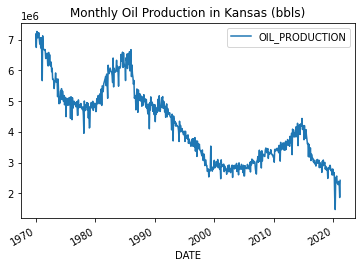

In [44]:
# Oil production by year ("State Total")
df[df['COUNTY']=='State Total'].plot(x = 'DATE', y = ['OIL_PRODUCTION'], title = "Monthly Oil Production in Kansas (bbls)")

<AxesSubplot:title={'center':'Monthly Gas Production in Kansas (mcf)'}, xlabel='DATE'>

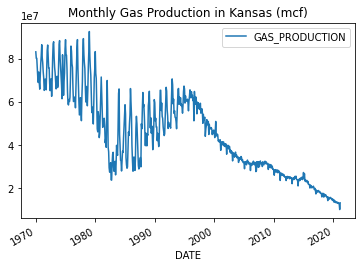

In [45]:
# Gas production by year ("State Total")
df[df['COUNTY']=='State Total'].plot(x = 'DATE', y = ['GAS_PRODUCTION'], title = "Monthly Gas Production in Kansas (mcf)")

In [39]:
# Looks like there might be a lot of seasonal (?) variability? Or is this just tied to when reports are submitted?